# Task 1

https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

My dataset contains health information from a wide range of patients. The target variable is the diabetes column, which shows whether the patient has diabetes or not. Other specific data in the dataset are bmi, smoke history, gender, age, etc. My goal is to predict the chances of someone having diabetes based on their medical history.


In [2]:
# Task 2

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('diabetes_prediction_dataset.csv')

df = df.dropna()

df = df.drop_duplicates(keep='first')

df = df.replace(['Female','Male','Other'], [0,1,2])

df = df.replace(['ever'], 'never')

df = df.replace(['never'],0)

df = df.replace(['current','former', 'not current'], 1)

df = df.replace(['No Info'], 2)

df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,2,27.32,6.6,80,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In the above code block I read in my data and replaced all the categorical variables with numerical values.

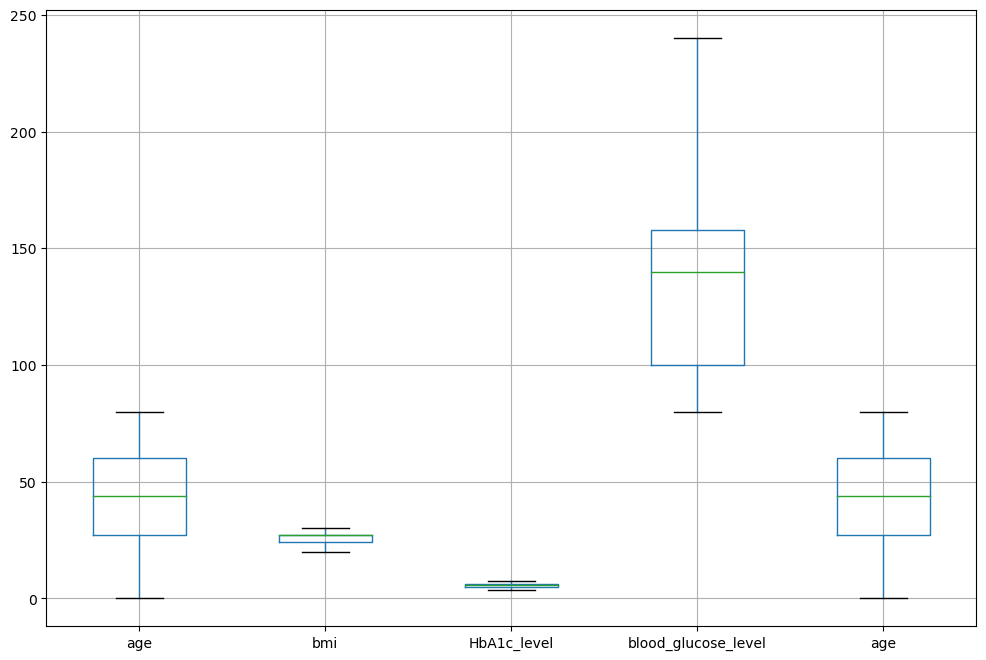

In [3]:
# Remove blood glucose outliers
df = df[df['blood_glucose_level'] < 250]

# Remove bmi outliers
df = df[df['bmi'] < 30 ]
df = df[df['bmi'] > 20]

# Remove outliers HbA1c Level
df = df[df['HbA1c_level'] < 8]

df.boxplot(column=['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'age'], figsize=(12,8))
plt.show()

In the above code block, I began removing obvious outliers from my dataset. Then I created boxplots for each of my numerical features to verify that I removed all outliers.

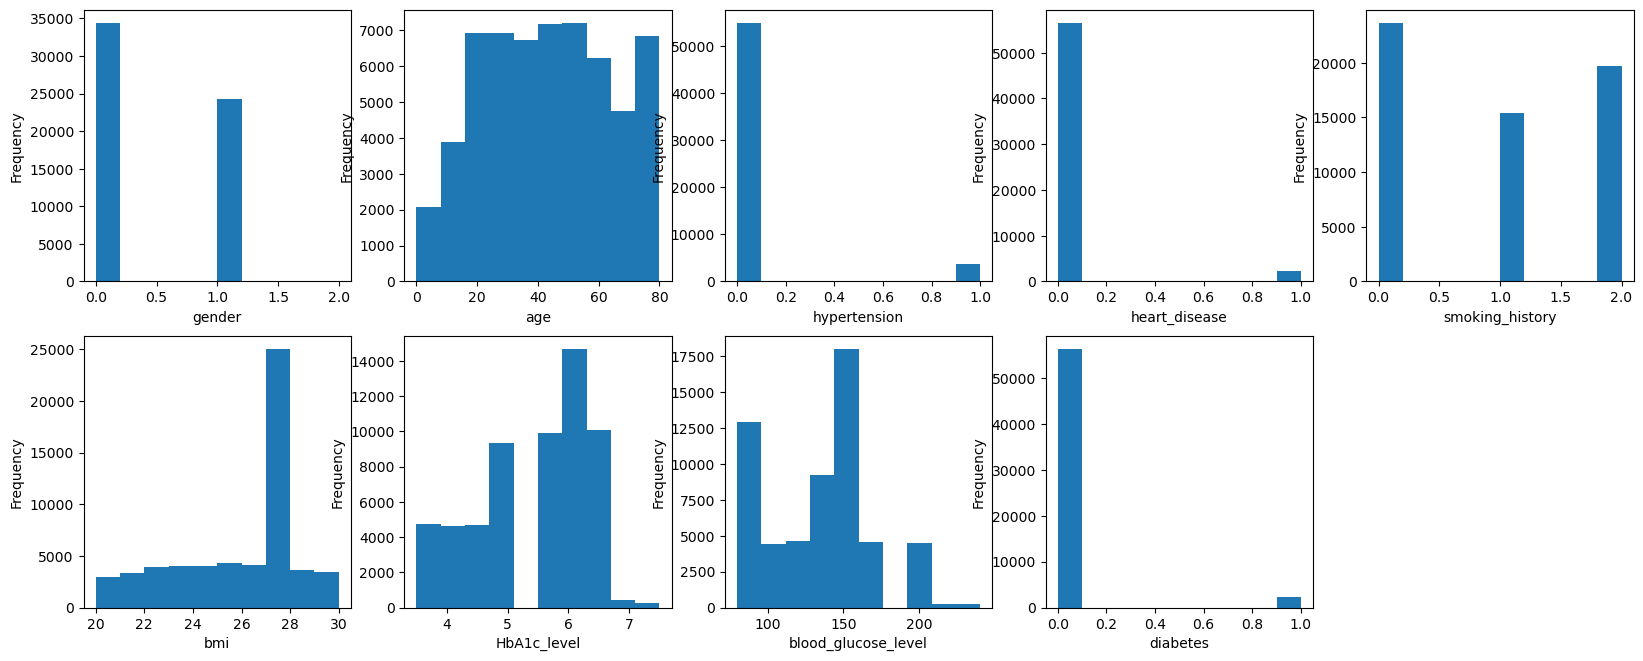

In [4]:
# Task 3


fig = plt.figure(figsize=(20, 12))
i=0
for column in df:
    sub=fig.add_subplot(3,5,i+1)
    sub.set_xlabel(column)
    df[column].plot(kind='hist')
    i=i+1

plt.show()

From my histograms, hypertension and heart_disease appear to show little variance. An overwhelming amount of data falls under 0 for both features.

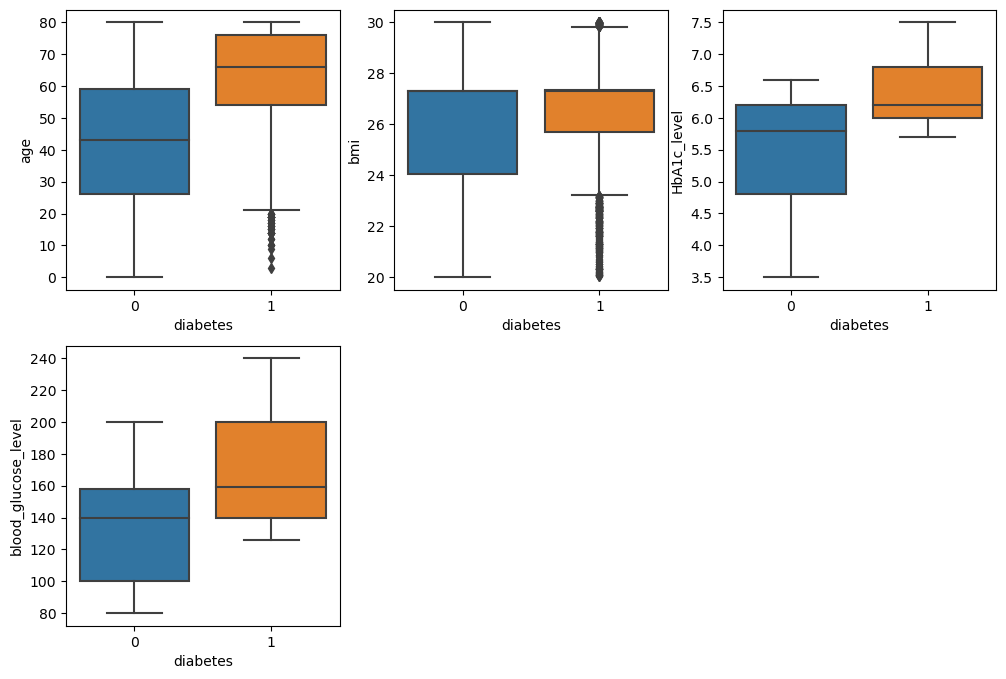

In [5]:
import seaborn as sns

num_list=['age','bmi','HbA1c_level','blood_glucose_level']
fig=plt.figure(figsize=(12, 8))

for i in range(len(num_list)):
    column=num_list[i]
    sub=fig.add_subplot(2,3,i+1)
    sns.boxplot(x='diabetes',y=column, data=df)

plt.show()

in the bmi boxplot, both plots looks almost the same. The rest of the plots show more obvious differences.

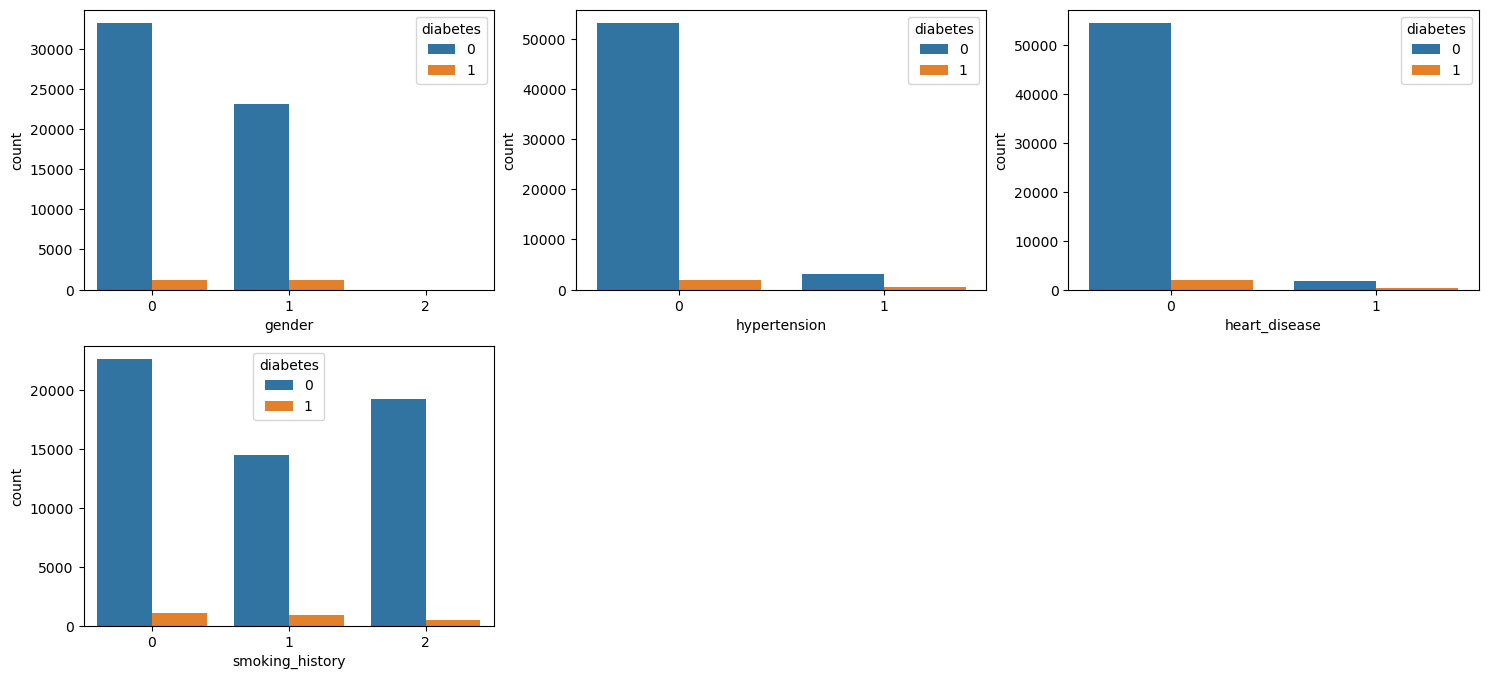

In [6]:
cat_list=['gender', 'hypertension', 'heart_disease','smoking_history']

fig=plt.figure(figsize=(18,8))
for i in range(len(cat_list)):
    column=cat_list[i]
    sub=fig.add_subplot(2,3,i+1)
    chart=sns.countplot(x=column, hue='diabetes', data=df)

plt.show() 

In the gender graph women have a smaller sample size than men but almost the same amount of people who have diabetes, so I think it's safe to assume that women have a higher proportion of diabetes than men.

In the hypertension graph, the people with hypertension seem to have a larger proportion of diabetes than people without hypertension.

Similarly to the hypertension graph, the heart_disease graph shows that the proportion of people with heart disease are more likely to have diabetes than those without heart_disease.

The proportion of current smokers (1) appear to have a higher proportion for diabetes than the other demographics.

In [7]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2
import numpy as np

x = df.loc[:, ['age','bmi','HbA1c_level','blood_glucose_level']]
y = df.loc[:, 'diabetes']

fs = SelectKBest(score_func=f_classif, k='all') 
bestFeatures = fs.fit(x, y) 
np.set_printoptions(suppress = True)
print(bestFeatures.scores_) 
print(bestFeatures.pvalues_)


[2137.30899122  235.84774007 2607.83361995 2308.55617733]
[0. 0. 0. 0.]


The P-values for all of the numerical features are good. The scores for the features are also good, however the score for bmi is a little low compared to the others.

These features should have a good significance to the target variable (diabetes).

In [8]:
x = df.loc[:, ['gender', 'hypertension', 'heart_disease','smoking_history']]
y = df.loc[:, 'diabetes']

chi = SelectKBest(score_func=chi2, k='all')
catFeatures = chi.fit(x, y)
print(catFeatures.scores_)
print(catFeatures.pvalues_)


[  46.98564217 1122.23242094  960.61500971   65.04976478]
[0. 0. 0. 0.]


The pscores for each of the categorical features look great, so I would assume the features show good relevance to the target variable. However, If I were to remove features it would be 'gender' and 'smoking_history', as their score a low compared to the others.

In [9]:
df.corr()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,-0.002838,0.012969,0.083910,0.076766,0.124638,0.012856,0.013703,0.036916
age,-0.002838,1.000000,0.250553,0.235844,-0.101851,0.159958,0.037508,0.040561,0.187325
hypertension,0.012969,0.250553,1.000000,0.115724,-0.057235,0.057751,0.028316,0.030111,0.142775
heart_disease,0.083910,0.235844,0.115724,1.000000,0.003799,0.035943,0.023296,0.025430,0.130311
smoking_history,0.076766,-0.101851,-0.057235,0.003799,1.000000,0.077699,-0.009340,-0.010839,-0.037512
bmi,0.124638,0.159958,0.057751,0.035943,0.077699,1.000000,0.014029,0.022370,0.063221
HbA1c_level,0.012856,0.037508,0.028316,0.023296,-0.009340,0.014029,1.000000,0.042210,0.206125
blood_glucose_level,0.013703,0.040561,0.030111,0.025430,-0.010839,0.022370,0.042210,1.000000,0.194412
diabetes,0.036916,0.187325,0.142775,0.130311,-0.037512,0.063221,0.206125,0.194412,1.000000


Based on the Anova test, all of the numerical features show good variance. The F-score for bmi feature is a little low compared to the others, but the P value is 0.

Based on the Chi-squared test, all of the categorical variables are relevant to the target variable (diabetes).

None of the features are highly correlated to each other or to the target variable based on the above correlation matrix.

For my feature scaling, I will be using the MinMaxScaler algorithm to Normalize my data.

None of my categorical features need to be dummy variables.

In [21]:
# Normalization

x_final = df.loc[:, ['hypertension', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'age', 'heart_disease']]
from sklearn.preprocessing import MinMaxScaler
nor_x= MinMaxScaler()    
x_scaled= nor_x.fit_transform(x_final)

print(x_scaled)

[[0.         0.51903808 0.775      0.375      1.         1.        ]
 [0.         0.73246493 0.775      0.         0.67467467 0.        ]
 [0.         0.73246493 0.55       0.4875     0.34934935 0.        ]
 ...
 [0.         0.45991984 0.325      0.40625    0.44944945 0.        ]
 [0.         0.78356713 0.55       0.46875    0.82482482 0.        ]
 [0.         0.24248497 0.775      0.0625     0.71221221 0.        ]]


I chose not to include gender and smoking_history because their f-scores were pretty low.

In [11]:
# Task 4

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y) 



Creating the training split with a 20% test size and 80% training size.

In [12]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
oversampled_x,oversampled_y=os.fit_resample(x_train, y_train)

print(x_train.shape)
print(oversampled_x.shape)


(47018, 4)
(90176, 4)


Accuracy Score: 0.7763504891535516
Recall:  0.47717842323651455
Precision: 0.08822401227464519


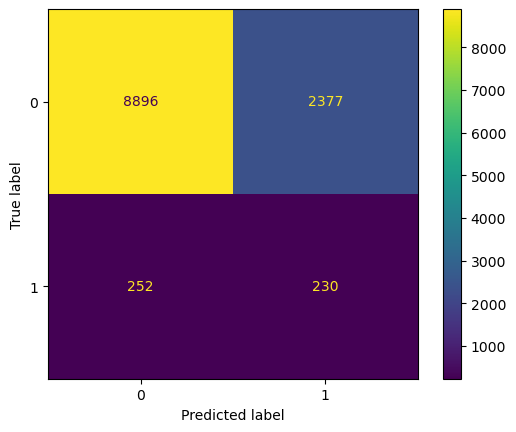

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

LogRegression = LogisticRegression(penalty=None, max_iter=2000)
LogRegression.fit(oversampled_x, oversampled_y.values.ravel())

test_pred = LogRegression.predict(x_test)
print(f'Accuracy Score: {accuracy_score(y_test, test_pred)}')

print(f'Recall: ',metrics.recall_score(y_test, test_pred, zero_division=1))
print(f'Precision:',metrics.precision_score(y_test, test_pred, zero_division=1))

ConfusionMatrixDisplay.from_estimator(LogRegression, x_test, y_test)

plt.show()


Does this data need to be balanced? Yes, I balanced the data.

Do you use train_test_split or cross validation to validate the result? I used train_test_split to validate result.

Which algorithm is appropriate for this problem? Logistic Regression algorithm

Which metrics do you use to evaluate the prediction model? The accuracy score, confusion matrix, Recall and Precision score.
